# Stablecoin Health Monitor

### 1. Fetching Stablecoin Data from CoinGecko (using Pro API Key) and saving it on a joblib file

In [14]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

# Load your API key from .env file
load_dotenv()
COINGECKO_PRO_API_KEY = os.getenv("COINGECKO_PRO_API_KEY")

# Set up API endpoint and parameters
url = "https://pro-api.coingecko.com/api/v3/coins/markets"
params = {
    "vs_currency": "usd",
    "category": "stablecoins",
    "order": "market_cap_desc",
    "per_page": 50,
    "page": 1,
    "sparkline": False
}
headers = {
    "x-cg-pro-api-key": COINGECKO_PRO_API_KEY
}

# Make the request
response = requests.get(url, params=params, headers=headers)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame(data)
df.head()

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.000000,168567697674,4,168567697674,8.706166e+10,1.000000,...,1.685405e+11,NaN,1.320,-24.40732,2018-07-24T00:00:00.000Z,0.572521,74.69458,2015-03-02T00:00:00.000Z,None,2025-09-05T12:41:11.624Z
1,usd-coin,usdc,USDC,https://coin-images.coingecko.com/coins/images...,0.999812,72547859292,7,72572931610,8.787633e+09,0.999905,...,7.258663e+10,NaN,1.170,-14.74213,2019-05-08T00:40:28.300Z,0.877647,13.92105,2023-03-11T08:02:13.981Z,None,2025-09-05T12:41:12.174Z
2,ethena-usde,usde,Ethena USDe,https://coin-images.coingecko.com/coins/images...,1.000000,12631162374,18,12631162374,2.732715e+08,1.002000,...,1.262910e+10,NaN,1.032,-3.08616,2023-12-20T15:38:34.596Z,0.929486,7.61113,2024-10-04T07:57:15.809Z,None,2025-09-05T12:41:15.588Z
3,usds,usds,USDS,https://coin-images.coingecko.com/coins/images...,0.999706,8130675875,29,8130675875,4.462359e+06,1.000000,...,8.133765e+09,NaN,1.057,-5.45349,2024-10-29T05:40:51.197Z,0.948265,5.42001,2024-10-03T13:19:28.826Z,None,2025-09-05T12:41:11.699Z
4,dai,dai,Dai,https://coin-images.coingecko.com/coins/images...,0.999273,4560575596,42,4560575596,5.876204e+07,1.001000,...,4.563530e+09,NaN,1.220,-17.96166,2020-03-13T03:02:50.373Z,0.881960,13.38275,2023-03-11T07:50:50.514Z,None,2025-09-05T12:41:14.944Z


In [15]:
df['symbol'].value_counts().sum()
df.shape

(50, 26)

In [16]:
import joblib

# Save raw data (list of dicts) to a joblib file
joblib.dump(data, "../data/stablecoins_raw.joblib")

['../data/stablecoins_raw.joblib']

In [17]:
stables_df = joblib.load("../data/stablecoins_raw.joblib")

stables_df = pd.DataFrame(stables_df)

stables_df

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.000000,168567697674,4,168567697674,8.706166e+10,1.000000,...,1.685405e+11,NaN,1.320,-24.40732,2018-07-24T00:00:00.000Z,5.725210e-01,7.469458e+01,2015-03-02T00:00:00.000Z,None,2025-09-05T12:41:11.624Z
1,usd-coin,usdc,USDC,https://coin-images.coingecko.com/coins/images...,0.999812,72547859292,7,72572931610,8.787633e+09,0.999905,...,7.258663e+10,NaN,1.170,-14.74213,2019-05-08T00:40:28.300Z,8.776470e-01,1.392105e+01,2023-03-11T08:02:13.981Z,None,2025-09-05T12:41:12.174Z
2,ethena-usde,usde,Ethena USDe,https://coin-images.coingecko.com/coins/images...,1.000000,12631162374,18,12631162374,2.732715e+08,1.002000,...,1.262910e+10,NaN,1.032,-3.08616,2023-12-20T15:38:34.596Z,9.294860e-01,7.611130e+00,2024-10-04T07:57:15.809Z,None,2025-09-05T12:41:15.588Z
3,usds,usds,USDS,https://coin-images.coingecko.com/coins/images...,0.999706,8130675875,29,8130675875,4.462359e+06,1.000000,...,8.133765e+09,NaN,1.057,-5.45349,2024-10-29T05:40:51.197Z,9.482650e-01,5.420010e+00,2024-10-03T13:19:28.826Z,None,2025-09-05T12:41:11.699Z
4,dai,dai,Dai,https://coin-images.coingecko.com/coins/images...,0.999273,4560575596,42,4560575596,5.876204e+07,1.001000,...,4.563530e+09,NaN,1.220,-17.96166,2020-03-13T03:02:50.373Z,8.819600e-01,1.338275e+01,2023-03-11T07:50:50.514Z,None,2025-09-05T12:41:14.944Z
5,usd1-wlfi,usd1,USD1,https://coin-images.coingecko.com/coins/images...,0.998775,2625574994,59,2625574994,4.367946e+08,0.999817,...,2.628236e+09,NaN,1.025,-2.51594,2025-05-12T12:36:39.412Z,9.897030e-01,9.436000e-01,2025-04-16T00:36:15.580Z,None,2025-09-05T12:41:11.602Z
6,bfusd,bfusd,BFUSD,https://coin-images.coingecko.com/coins/images...,0.999540,1698883429,81,1698883429,7.666500e+06,0.999793,...,1.700000e+09,NaN,1.000,-0.07687,2025-08-16T06:23:06.565Z,9.985540e-01,8.553000e-02,2025-08-21T20:27:41.005Z,None,2025-09-05T12:41:13.990Z
7,falcon-finance,usdf,Falcon USD,https://coin-images.coingecko.com/coins/images...,0.999195,1642591730,84,1642591730,1.323847e+07,1.001000,...,1.644625e+09,NaN,1.075,-7.01365,2025-05-08T21:25:42.071Z,9.434220e-01,5.913840e+00,2025-07-08T10:16:34.749Z,None,2025-09-05T12:41:15.570Z
8,usdtb,usdtb,USDtb,https://coin-images.coingecko.com/coins/images...,0.998616,1600973151,88,1600973151,2.203137e+06,1.002000,...,1.600738e+09,NaN,1.018,-1.69335,2024-12-20T13:43:38.196Z,9.005020e-01,1.108864e+01,2025-07-17T08:05:52.672Z,None,2025-09-05T12:41:11.424Z
9,tether-gold,xaut,Tether Gold,https://coin-images.coingecko.com/coins/images...,3576.790000,1341224918,99,1341224918,2.849745e+07,3576.850000,...,3.755722e+05,NaN,3584.600,-0.86967,2025-09-03T17:07:29.815Z,1.447840e+03,1.454294e+02,2020-03-19T13:45:41.821Z,None,2025-09-05T12:41:10.858Z


In [18]:
stables_df.columns

Index(['id', 'symbol', 'name', 'image', 'current_price', 'market_cap',
       'market_cap_rank', 'fully_diluted_valuation', 'total_volume',
       'high_24h', 'low_24h', 'price_change_24h',
       'price_change_percentage_24h', 'market_cap_change_24h',
       'market_cap_change_percentage_24h', 'circulating_supply',
       'total_supply', 'max_supply', 'ath', 'ath_change_percentage',
       'ath_date', 'atl', 'atl_change_percentage', 'atl_date', 'roi',
       'last_updated'],
      dtype='object')

In [19]:
filtered_stables = stables_df[['id', 'symbol', 'name', 'market_cap', 'market_cap_rank', 'market_cap_change_percentage_24h', 'last_updated']].query(" symbol == 'usdt' or symbol == 'usdc' or symbol == 'dai' or symbol == 'busd' or symbol == 'frax' or symbol == 'lusd' or symbol == 'susd' or symbol == 'pyusd' or symbol == 'rlusd' or symbol == 'usds' or symbol == 'tusd'")

In [20]:
clean_filtered_stables = filtered_stables.rename(columns={'market_cap':'current market cap', 'market_cap_rank':'market cap rank', 'market_cap_change_percentage_24h':'% market cap change (last 24h)', 'last_updated':'last updated'})
clean_filtered_stables['last updated'] = pd.to_datetime(clean_filtered_stables['last updated'])
clean_filtered_stables.set_index('market cap rank', inplace=True)

In [21]:
joblib.dump(clean_filtered_stables, "../data/stablecoins_filtered.joblib")

['../data/stablecoins_filtered.joblib']

In [22]:
clean_filtered_stables = joblib.load("../data/stablecoins_filtered.joblib")

clean_filtered_stables

,id,symbol,name,current market cap,% market cap change (last 24h),last updated
market cap rank,,,,,,
4,tether,usdt,Tether,168567697674,0.11219,2025-09-05 12:41:11.624000+00:00
7,usd-coin,usdc,USDC,72547859292,-0.09214,2025-09-05 12:41:12.174000+00:00
29,usds,usds,USDS,8130675875,-0.24512,2025-09-05 12:41:11.699000+00:00
42,dai,dai,Dai,4560575596,-0.92273,2025-09-05 12:41:14.944000+00:00
107,paypal-usd,pyusd,PayPal USD,1173206599,-0.80900,2025-09-05 12:41:08.429000+00:00
147,ripple-usd,rlusd,Ripple USD,709733737,0.00239,2025-09-05 12:41:09.345000+00:00
180,true-usd,tusd,TrueUSD,493662273,-0.02305,2025-09-05 12:41:11.113000+00:00
248,binance-peg-busd,busd,Binance-Peg BUSD,312442000,0.14129,2025-09-05 12:41:13.971000+00:00
256,frax,frax,Legacy Frax Dollar,296391997,0.24566,2025-09-05 12:41:15.856000+00:00




2. Fetching global market data to get stablecoin dominance

In [29]:
# Usdt and usdc alone

# Fetch global market data from CoinGecko
global_url = "https://pro-api.coingecko.com/api/v3/global"
global_response = requests.get(global_url, headers=headers)
global_data = global_response.json()

market_caps = global_data['data']['market_cap_percentage']
stablecoin_dominance = market_caps.get('usdt', 0) + market_caps.get('usdc', 0)
print("Total Stablecoin Dominance (%) of USDT and USDC alone:", stablecoin_dominance, "%")

Total Stablecoin Dominance (%) of USDT and USDC alone: 6.081465832039425 %


In [30]:
# Calculate individual dominance for all major stablecoins using /coins/markets data
# Get total market cap from global data
total_market_cap = global_data['data']['total_market_cap']['usd']

# List of major stablecoins (update as needed)
stablecoins = ['usdt', 'usdc', 'dai', 'busd', 'tusd', 'gusd', 'frax', 'eurt', 'alusd']

# Use the original CoinGecko markets DataFrame for market cap calculations

df_markets = pd.DataFrame(data)

# Calculate dominance for each stablecoin
dominance_dict = {}
for coin in stablecoins:
    coin_data = df_markets[df_markets['symbol'] == coin]
    if not coin_data.empty and 'market_cap' in coin_data.columns:
        market_cap = coin_data.iloc[0]['market_cap']
        dominance = (market_cap / total_market_cap) * 100
        dominance_dict[coin] = dominance
    else:
        dominance_dict[coin] = 0

# Filter out stablecoins with zero dominance
filtered_dominance = {coin: dom for coin, dom in dominance_dict.items() if dom > 0}

print("Major Stablecoins with Non-Zero Dominance (%):", filtered_dominance)
print("Total Stablecoin Dominance (%):", sum(filtered_dominance.values()))

Major Stablecoins with Non-Zero Dominance (%): {'usdt': np.float64(4.252133448611781), 'usdc': np.float64(1.8300254638185929), 'dai': np.float64(0.11504087855656386), 'busd': np.float64(0.007881374054953814), 'tusd': np.float64(0.012452669712560179), 'frax': np.float64(0.0074765114653335615)}
Total Stablecoin Dominance (%): 6.225010346219785


In [31]:
# Put filtered dominance results in a DataFrame
import pandas as pd

filtered_dominance = {coin: dom for coin, dom in dominance_dict.items() if dom > 0}
dominance_df = pd.DataFrame(list(filtered_dominance.items()), columns=['Stablecoin', 'Dominance (%)'])
dominance_df

,Stablecoin,Dominance (%)
0,usdt,4.252133
1,usdc,1.830025
2,dai,0.115041
3,busd,0.007881
4,tusd,0.012453
5,frax,0.007477


In [32]:
joblib.dump(dominance_df, "../data/current_dominance_df.joblib")

['../data/current_dominance_df.joblib']

In [33]:
dominance_df = joblib.load("../data/current_dominance_df.joblib")

In [34]:
import plotly.express as px

# Interactive bar chart
fig = px.bar(
    dominance_df,
    x="Stablecoin",
    y="Dominance (%)",
    text="Dominance (%)",
    title="Stablecoin Dominance (%)",
    labels={"Stablecoin": "Stablecoin", "Dominance (%)": "Dominance (%)"},
    template="plotly_white"
)

# Add text on top of bars
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Adjust layout
fig.update_layout(
    xaxis_title="Stablecoin",
    yaxis_title="Dominance (%)",
    height=600,
    width=800
)

fig.show()

In [36]:
fig = px.pie(
    dominance_df,
    names="Stablecoin",
    values="Dominance (%)",
    title="Stablecoin Dominance (%)",
    hole=0.3,  # makes it a donut chart
    template="plotly_white"
)

fig.update_traces(textinfo="label+percent", hovertemplate="Stablecoin: %{label}<br>Dominance: %{value:.2f}%")

fig.show()

In [37]:
print("Total Stablecoin Dominance (%) of these 6 stablecoins:", sum(filtered_dominance.values()), "%")

Total Stablecoin Dominance (%) of these 6 stablecoins: 6.225010346219785 %


## 3. Analyzing Peg Deviation

This calculates how much each stablecoin’s price deviates from $1 (the peg).

a. Current peg deviation

In [38]:
# Analyze Peg Deviation for Major Stablecoins (6 of them)

# Use filtered_dominance keys to focus on major stablecoins with non-zero dominance
peg_deviation = {}
for coin in filtered_dominance.keys():
    coin_data = df[df['symbol'] == coin]
    if not coin_data.empty:
        price = coin_data.iloc[0]['current_price']
        deviation = price - 1  # Difference from $1
        peg_deviation[coin] = deviation

# Put results in a DataFrame
peg_df = pd.DataFrame(list(peg_deviation.items()), columns=['Stablecoin', 'Peg Deviation ($)'])
peg_df

,Stablecoin,Peg Deviation ($)
0,usdt,0.000000
1,usdc,-0.000188
2,dai,-0.000727
3,busd,-0.002199
4,tusd,-0.002854
5,frax,-0.002505


In [43]:
peg_df['Peg Deviation (%)'] = peg_df['Peg Deviation ($)'] * 100
peg_df

,Stablecoin,Peg Deviation ($),Peg Deviation (%)
0,usdt,0.000000,0.0000
1,usdc,-0.000188,-0.0188
2,dai,-0.000727,-0.0727
3,busd,-0.002199,-0.2199
4,tusd,-0.002854,-0.2854
5,frax,-0.002505,-0.2505


#### b. Peg deviation overtime for these 6 major stablecoins in the last 365 days

In [44]:
import joblib

# CoinGecko IDs for the 6 major stablecoins in my case study
coingecko_ids = {
    'usdt': 'tether',
    'usdc': 'usd-coin',
    'dai': 'dai',
    'busd': 'binance-usd',
    'tusd': 'true-usd',
    'frax': 'frax'
}

# Function to fetch historical prices and calculate peg deviation
def fetch_historical_deviation(coin_id, days=365):
    url = f"https://pro-api.coingecko.com/api/v3/coins/{coin_id}/market_chart"
    params = {
        "vs_currency": "usd",
        "days": days
    }
    headers = {"x-cg-pro-api-key": COINGECKO_PRO_API_KEY}
    response = requests.get(url, params=params, headers=headers)
    data = response.json()
    prices = data.get("prices", [])
    df = pd.DataFrame(prices, columns=["timestamp", "price"])
    df["date"] = pd.to_datetime(df["timestamp"], unit="ms")
    df["peg_deviation (USD)"] = df["price"] - 1
    df["peg_deviation (%)"] = (df["price"] - 1) * 100
    return df

# Fetch historical peg deviation for each stablecoin (last 365 days)
historical_deviation_data = {}
for symbol, coin_id in coingecko_ids.items():
    df_hist = fetch_historical_deviation(coin_id, days=365)
    historical_deviation_data[symbol] = df_hist

# Save the historical deviation data to a joblib file
joblib.dump(historical_deviation_data, "../data/stablecoins_historical_deviation.joblib")

['../data/stablecoins_historical_deviation.joblib']

In [45]:
historical_deviation_data = joblib.load("../data/stablecoins_historical_deviation.joblib")

# Concatenate all DataFrames, adding a column for the stablecoin symbol
df = pd.concat(
	[df_hist.assign(symbol=symbol) for symbol, df_hist in historical_deviation_data.items() if not df_hist.empty],
	ignore_index=True
)
df.shape

(2196, 6)

In [46]:
df.nunique()

timestamp               371
price                  2196
date                    371
peg_deviation (USD)    2196
peg_deviation (%)      2196
symbol                    6
dtype: int64

In [47]:
df['symbol'].value_counts()

symbol
usdt    366
usdc    366
dai     366
busd    366
tusd    366
frax    366
Name: count, dtype: int64

In [48]:
for symbol, df_hist in historical_deviation_data.items():
    print(symbol, df_hist.shape)

usdt (366, 5)
usdc (366, 5)
dai (366, 5)
busd (366, 5)
tusd (366, 5)
frax (366, 5)


In [49]:
df.head()

,timestamp,price,date,peg_deviation (USD),peg_deviation (%),symbol
0,1725580800000,0.999541,2024-09-06,-0.000459,-0.045869,usdt
1,1725667200000,1.000017,2024-09-07,0.000017,0.001674,usdt
2,1725753600000,1.000204,2024-09-08,0.000204,0.020435,usdt
3,1725840000000,0.999248,2024-09-09,-0.000752,-0.075245,usdt
4,1725926400000,0.999537,2024-09-10,-0.000463,-0.046332,usdt


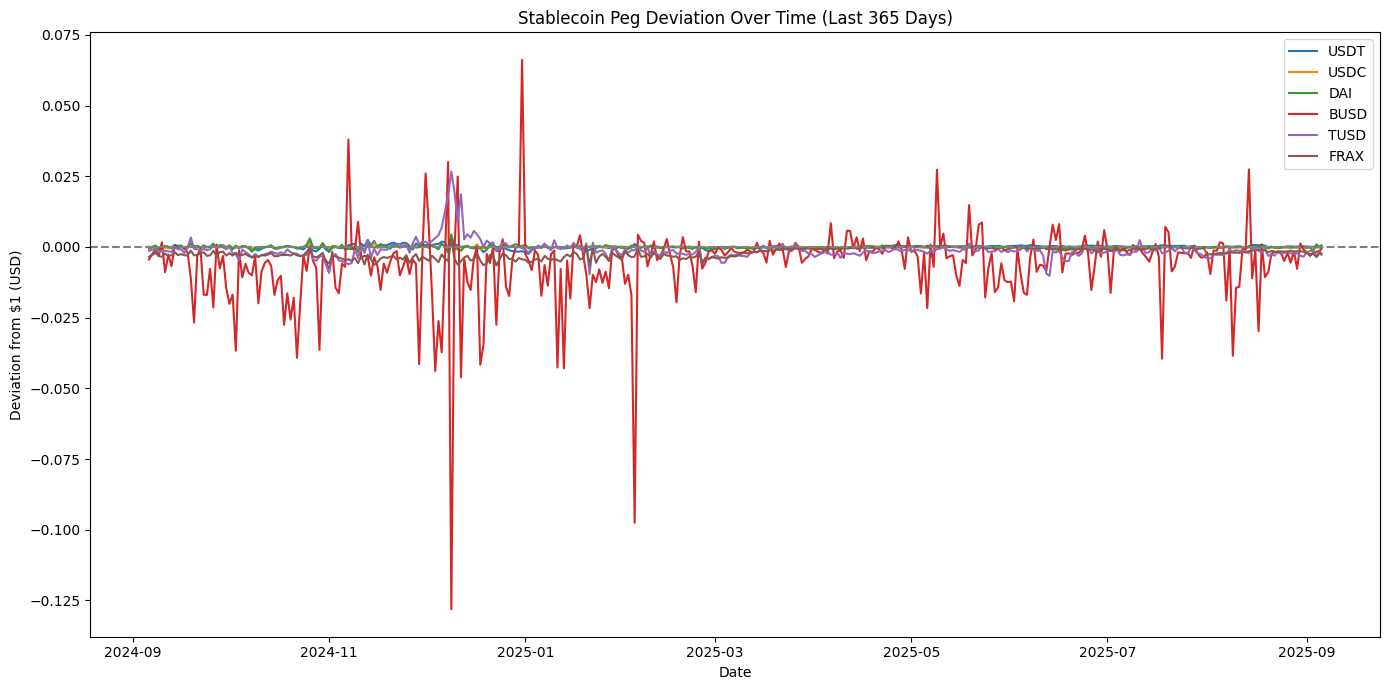

In [50]:
# using matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
for symbol, df_hist in historical_deviation_data.items():
    if not df_hist.empty:
        plt.plot(df_hist["date"], df_hist["peg_deviation (USD)"], label=symbol.upper())

plt.axhline(0, color="gray", linestyle="--")
plt.title("Stablecoin Peg Deviation Over Time (Last 365 Days)")
plt.xlabel("Date")
plt.ylabel("Deviation from $1 (USD)")
plt.legend()
plt.tight_layout()
plt.show()

In [51]:
# using plotly for interactive visualization and log scale for y-axis

import plotly.graph_objs as go
import plotly.offline as pyoff

# Create interactive chart with log scale for y-axis
fig = go.Figure()

for symbol, df_hist in historical_deviation_data.items():
    if not df_hist.empty:
        fig.add_trace(go.Scatter(
            x=df_hist["date"],
            y=df_hist["peg_deviation (USD)"].abs() + 1e-8,  # add small value to avoid log(0)
            mode='lines',
            name=symbol.upper()
        ))

fig.update_layout(
    title="Stablecoin Peg Deviation Over Time (Last 365 Days) [Log Scale]",
    xaxis_title="Date",
    yaxis_title="Deviation from $1 (log scale, abs)",
    yaxis_type="log",
    legend_title="Stablecoin",
    template="plotly_white",
    height=600,
    width=1000
)

pyoff.iplot(fig)

### 4. Getting onchain mint / burn data from my Dune query - https://dune.com/queries/5719194

In [52]:
import os
import pandas as pd
from dotenv import load_dotenv
load_dotenv()

dune_api_key = os.getenv("DUNE_API_KEY")

from dune_client.client import DuneClient
dune = DuneClient(dune_api_key)
query_result = dune.get_latest_result(5719194)

print(query_result.result)

ExecutionResult(rows=[{'BUSD burns': 0, 'BUSD mints': 0, 'BUSD supply': 55026240.2059419, 'DAI burns': -1013288075.723995, 'DAI mints': 1056715469.1322833, 'DAI supply': 4615325447.125135, 'FRAX burns': 0, 'FRAX mints': 0, 'FRAX supply': 296926532.5068286, 'LUSD burns': -343830.0320351251, 'LUSD mints': 53322.5731869419, 'LUSD supply': 38123526.77169894, 'PYUSD burns': -9190565.734848, 'PYUSD mints': 14777130.593745, 'PYUSD supply': 928019833.0413319, 'RLUSD burns': 0, 'RLUSD mints': 0, 'RLUSD supply': 616045484.55, 'USDC burns': -662264702.9240241, 'USDC mints': 701665808.8851131, 'USDC supply': 47162302241.040794, 'USDS burns': -364422012.65559036, 'USDS mints': 472312828.3250365, 'USDS supply': 4333691531.468174, 'sUSD burns': 0, 'sUSD mints': 1132499.493895871, 'sUSD supply': 41172237.58933132, 'week': '2025-09-01 00:00:00.000 UTC'}, {'BUSD burns': 0, 'BUSD mints': 0, 'BUSD supply': 55026240.2059419, 'DAI burns': -4275120242.6837163, 'DAI mints': 4488411162.875096, 'DAI supply': 45

In [53]:
import pandas as pd

rows = query_result.result.rows

df = pd.DataFrame(rows)

df.shape

(365, 28)

In [54]:
df.head()

,BUSD burns,BUSD mints,BUSD supply,DAI burns,DAI mints,DAI supply,FRAX burns,FRAX mints,FRAX supply,LUSD burns,...,USDC burns,USDC mints,USDC supply,USDS burns,USDS mints,USDS supply,sUSD burns,sUSD mints,sUSD supply,week
0,0.0,0.0,5.502624e+07,-1.013288e+09,1.056715e+09,4.615325e+09,0.000000e+00,0.0,2.969265e+08,-343830.032035,...,-6.622647e+08,7.016658e+08,4.716230e+10,-3.644220e+08,4.723128e+08,4.333692e+09,0.000000e+00,1.132499e+06,4.117224e+07,2025-09-01 00:00:00.000 UTC
1,0.0,0.0,5.502624e+07,-4.275120e+09,4.488411e+09,4.571898e+09,0.000000e+00,0.0,2.969265e+08,-479866.754522,...,-3.130862e+09,6.217926e+09,4.712290e+10,-2.862123e+09,2.923418e+09,4.225801e+09,-4.300000e+05,1.217965e+06,4.003974e+07,2025-08-25 00:00:00.000 UTC
2,0.0,0.0,5.502624e+07,-5.401021e+09,5.651767e+09,4.358607e+09,-4.119302e+04,0.0,2.969265e+08,-669031.325992,...,-3.956974e+09,2.929476e+09,4.403584e+10,-3.293347e+09,2.968563e+09,4.164507e+09,-1.801582e+05,2.501694e+06,3.925177e+07,2025-08-18 00:00:00.000 UTC
3,0.0,0.0,5.502624e+07,-6.077834e+09,6.361997e+09,4.107861e+09,-1.664812e+06,0.0,2.969677e+08,-620182.602544,...,-3.850290e+09,6.418029e+09,4.506333e+10,-4.841229e+09,4.518181e+09,4.489290e+09,-1.141180e+06,5.819456e+05,3.693024e+07,2025-08-11 00:00:00.000 UTC
4,0.0,0.0,5.502624e+07,-6.398433e+09,6.476942e+09,3.823699e+09,0.000000e+00,0.0,2.986325e+08,-875676.476450,...,-2.840476e+09,3.408760e+09,4.249560e+10,-2.568139e+09,2.896373e+09,4.812337e+09,-2.104048e+10,2.104115e+10,3.748947e+07,2025-08-04 00:00:00.000 UTC


In [55]:
df['week'] = pd.to_datetime(df['week'])
df_week = df.set_index('week')


df_week.head()

,BUSD burns,BUSD mints,BUSD supply,DAI burns,DAI mints,DAI supply,FRAX burns,FRAX mints,FRAX supply,LUSD burns,...,RLUSD supply,USDC burns,USDC mints,USDC supply,USDS burns,USDS mints,USDS supply,sUSD burns,sUSD mints,sUSD supply
week,,,,,,,,,,,,,,,,,,,,,
2025-09-01 00:00:00+00:00,0.0,0.0,5.502624e+07,-1.013288e+09,1.056715e+09,4.615325e+09,0.000000e+00,0.0,2.969265e+08,-343830.032035,...,6.160455e+08,-6.622647e+08,7.016658e+08,4.716230e+10,-3.644220e+08,4.723128e+08,4.333692e+09,0.000000e+00,1.132499e+06,4.117224e+07
2025-08-25 00:00:00+00:00,0.0,0.0,5.502624e+07,-4.275120e+09,4.488411e+09,4.571898e+09,0.000000e+00,0.0,2.969265e+08,-479866.754522,...,6.160455e+08,-3.130862e+09,6.217926e+09,4.712290e+10,-2.862123e+09,2.923418e+09,4.225801e+09,-4.300000e+05,1.217965e+06,4.003974e+07
2025-08-18 00:00:00+00:00,0.0,0.0,5.502624e+07,-5.401021e+09,5.651767e+09,4.358607e+09,-4.119302e+04,0.0,2.969265e+08,-669031.325992,...,6.008379e+08,-3.956974e+09,2.929476e+09,4.403584e+10,-3.293347e+09,2.968563e+09,4.164507e+09,-1.801582e+05,2.501694e+06,3.925177e+07
2025-08-11 00:00:00+00:00,0.0,0.0,5.502624e+07,-6.077834e+09,6.361997e+09,4.107861e+09,-1.664812e+06,0.0,2.969677e+08,-620182.602544,...,5.808381e+08,-3.850290e+09,6.418029e+09,4.506333e+10,-4.841229e+09,4.518181e+09,4.489290e+09,-1.141180e+06,5.819456e+05,3.693024e+07
2025-08-04 00:00:00+00:00,0.0,0.0,5.502624e+07,-6.398433e+09,6.476942e+09,3.823699e+09,0.000000e+00,0.0,2.986325e+08,-875676.476450,...,5.768381e+08,-2.840476e+09,3.408760e+09,4.249560e+10,-2.568139e+09,2.896373e+09,4.812337e+09,-2.104048e+10,2.104115e+10,3.748947e+07


In [56]:
supply_df = df[['week', 'USDC supply', 'DAI supply', 'LUSD supply', 'sUSD supply', 'PYUSD supply', 'RLUSD supply', 'USDS supply', 'BUSD supply', 'FRAX supply']]

supply_df.head()

,week,USDC supply,DAI supply,LUSD supply,sUSD supply,PYUSD supply,RLUSD supply,USDS supply,BUSD supply,FRAX supply
0,2025-09-01 00:00:00+00:00,4.716230e+10,4.615325e+09,3.812353e+07,4.117224e+07,9.280198e+08,6.160455e+08,4.333692e+09,5.502624e+07,2.969265e+08
1,2025-08-25 00:00:00+00:00,4.712290e+10,4.571898e+09,3.841403e+07,4.003974e+07,9.224333e+08,6.160455e+08,4.225801e+09,5.502624e+07,2.969265e+08
2,2025-08-18 00:00:00+00:00,4.403584e+10,4.358607e+09,3.865370e+07,3.925177e+07,9.314137e+08,6.008379e+08,4.164507e+09,5.502624e+07,2.969265e+08
3,2025-08-11 00:00:00+00:00,4.506333e+10,4.107861e+09,3.928036e+07,3.693024e+07,9.280479e+08,5.808381e+08,4.489290e+09,5.502624e+07,2.969677e+08
4,2025-08-04 00:00:00+00:00,4.249560e+10,3.823699e+09,3.963112e+07,3.748947e+07,7.883588e+08,5.768381e+08,4.812337e+09,5.502624e+07,2.986325e+08


In [57]:
current_week_supply = supply_df.loc[0]

current_week_supply

week            2025-09-01 00:00:00+00:00
USDC supply            47162302241.040794
DAI supply              4615325447.125135
LUSD supply               38123526.771699
sUSD supply               41172237.589331
PYUSD supply             928019833.041332
RLUSD supply                 616045484.55
USDS supply             4333691531.468174
BUSD supply               55026240.205942
FRAX supply              296926532.506829
Name: 0, dtype: object

In [58]:
current_supply = current_week_supply[1:]

current_supply

USDC supply     47162302241.040794
DAI supply       4615325447.125135
LUSD supply        38123526.771699
sUSD supply        41172237.589331
PYUSD supply      928019833.041332
RLUSD supply          616045484.55
USDS supply      4333691531.468174
BUSD supply        55026240.205942
FRAX supply       296926532.506829
Name: 0, dtype: object

<Axes: title={'center': 'Current Stablecoin Supply (in billions)'}, xlabel='Stablecoin', ylabel='Supply (in billions)'>

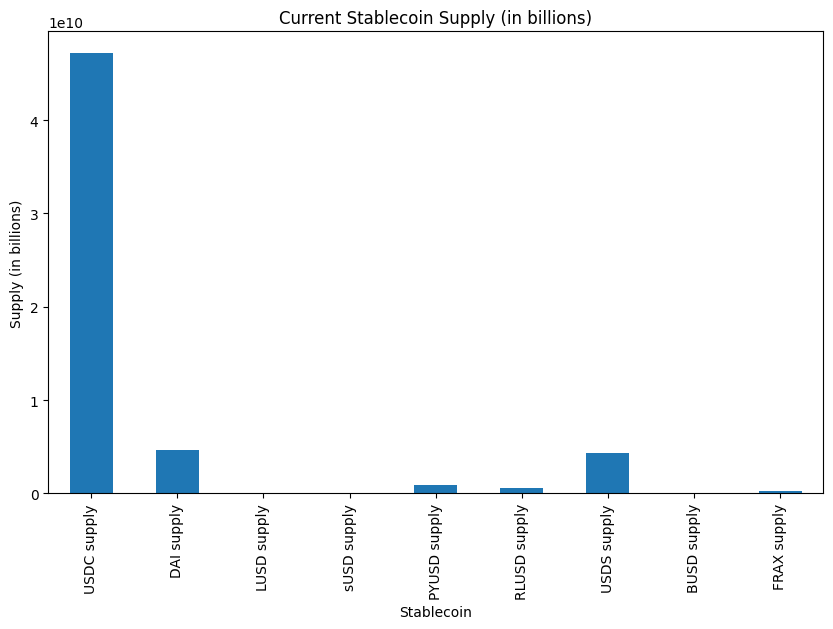

In [59]:
current_supply.plot(kind='bar', title='Current Stablecoin Supply (in billions)', figsize=(10, 6), ylabel='Supply (in billions)', xlabel='Stablecoin', legend=False)